In [0]:
from matplotlib import pyplot as plt
import numpy as np

# Plot data-points with matplotlib

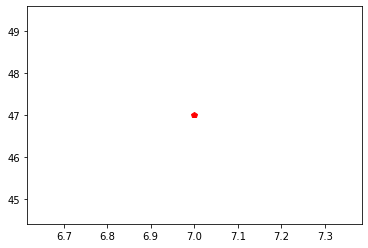

In [14]:
# Plot single point
# 1st, create a figure
fig = plt.figure()
# then create an 'ax' in this figure
ax = fig.add_subplot(111)
# plot red point at x=7, y=42
plt.plot(7,42,'rp')

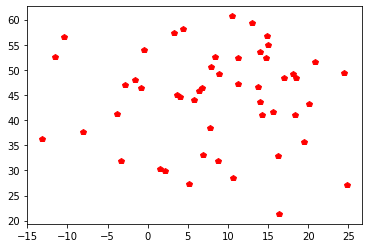

In [21]:
# Plot multiple points
# create a center
center = (7, 42)
# sample scaled normal distribution
datapoints = 10 * np.random.randn(50, 50)
# re-center data
datapoints[0, :] += center[0]
datapoints[1, :] += center[1]
# plot red point for every data-point
#...

plt.plot(datapoints[0,:],datapoints[1,:],'rp')

Text(0.5, 1.0, 'useless point clouds')

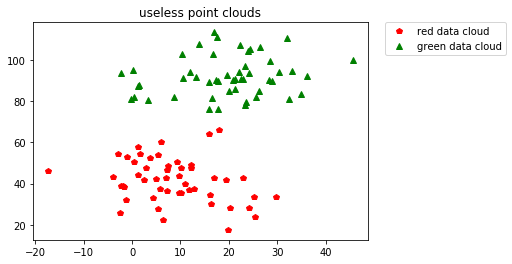

In [25]:
# Use colors, legend and title

# Data-cloud1
# -----------
# create a center
center1 = (7, 42)
# sample scaled normal distribution
datacloud1 = 10 * np.random.randn(50, 50)
# re-center data
datacloud1[0, :] += center1[0]
datacloud1[1, :] += center1[1]

# Data-cloud2
# -----------
# create a center
center2 = (18, 92)
# sample scaled normal distribution
datacloud2 = 10 * np.random.randn(50, 50)
# re-center data
datacloud2[0, :] += center2[0]
datacloud2[1, :] += center2[1]

# plot data cloud1 with red points
# plot data cloud2 with green triangles
# data cloud1 is called "red data cloud"
# data cloud2 is called "green data cloud"
# title of the plot should be "useless point clouds"
plt.plot(datacloud1[0,:],datacloud1[1,:],'rp',label="red data cloud")
plt.plot(datacloud2[0,:],datacloud2[1,:],'g^',label="green data cloud")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("useless point clouds")

# Plot curves with matplotlib

Text(0.5, 1.0, 'trigo')

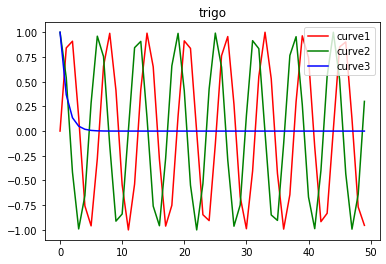

In [30]:
# Some functions
curve1 = np.sin(np.arange(50))
curve2 = np.cos(np.arange(50))
curve3 = np.exp(-np.arange(50))
# plot functions
# colors, labels, title, legends...

plt.plot(curve1,'r',label="curve1")
plt.plot(curve2,'g',label="curve2")
plt.plot(curve3,'b',label="curve3")
plt.legend()
plt.title("trigo")

## Let's use some real data

In [0]:
from sklearn import datasets
boston = datasets.load_boston()
# check the following attributes of boston:
# - boston.target (prices)
# - boston.feature_names (name of descriptor's components)
# - boston.data (values of each feature for each house in the dataset)

# Plot a curve price = f(feature) for every feature in the dataset
# titles and named axes plz
# You might need np.argsort at some point...
    

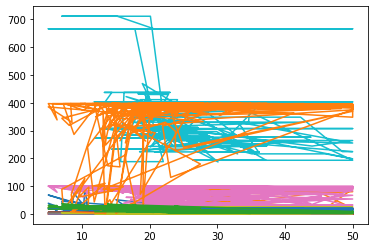

In [37]:
plt.plot(boston.target,boston.data)

# Read data from files with pandas and plot with seaborn

In [0]:
import pandas as pd
import seaborn as sns

     Unnamed: 0  accuracies  epochs  distance parameter  experiment
635          15    0.923864      15  0.054504     k=0,6           7
636          16    0.923864      16  0.054335     k=0,6           7
637          17    0.923864      17  0.054138     k=0,6           7
638          18    0.925000      18  0.054009     k=0,6           7
639          19    0.924432      19  0.053821     k=0,6           7
   Unnamed: 0  accuracies  epochs  distance parameter  experiment
0           0    0.696591       0  0.042117     k=0,5           0
1           1    0.851136       1  0.044463     k=0,5           0
2           2    0.896591       2  0.046504     k=0,5           0
3           3    0.912500       3  0.047552     k=0,5           0
4           4    0.922727       4  0.048296     k=0,5           0


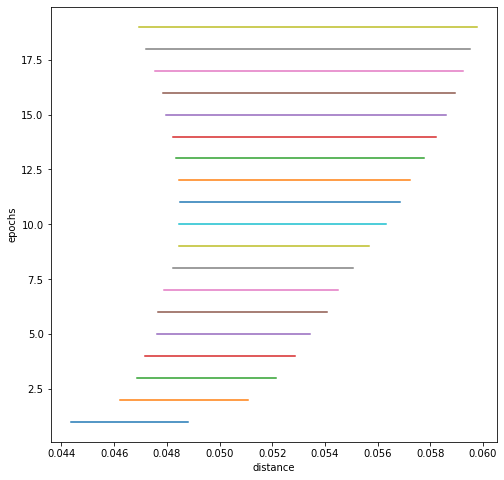

In [117]:
# read csv file with pandas
import io
import requests
url="https://waterponey.github.io/BigDataClass/files/euclidean_training.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))



# csv file: euclidean_training.csv
#data = pd.read_csv("...")
# print the resulting dataframe
print(data.tail())
print(data.head())
# create the matplotlib object
fig, ax = plt.subplots(figsize=(8, 8))
# plot with sns
# plot distance = f(epochs)
# one color = one value of parameter k
# for every value of k, multiple experiments were run 
# (i.e. multiple curves distance=f(epochs) exist)
# seaborn plots the average with transparency for dispersion
for i in range(1,20):
  sns.lineplot("distance","epochs",data=data[data['epochs']==i])
  #sns.lineplot("distance","epochs",data=data[data['epochs']==2])


#Mean<-range(1,20)
#for i in range(1,20):
#  temp=data[data['epochs']==i]
#  Mean[i]=np.mean(temp[temp['distance']])

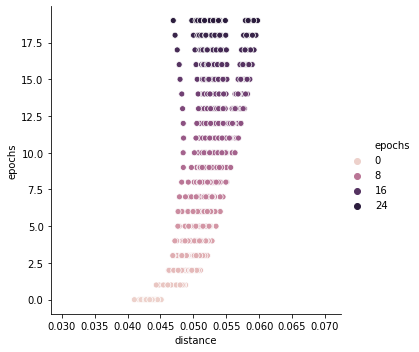

In [118]:
 ax= sns.relplot("distance","epochs",hue="epochs",ci="sd",estimator=np.mean,data=data)


In [39]:
! pip install smopy

# Plot geographical data

In [0]:
import os, ssl
#pip install smopy
import smopy
from matplotlib import pyplot as plt
import numpy as np
import json

# The following might be unnecessary (or even produce an error...)
# comment if necessary
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [0]:
# Here is a convenient object to create maps (geographical).
class Map(object):
    def __init__(self, latmin, latmax, longmin, longmax, zoom):
        self.latmin = latmin
        self.latmax = latmax
        self.longmin = longmin
        self.longmax = longmax
        self.zoom = zoom
        self.smopymap = smopy.Map((latmin, latmax, longmin, longmax), z=zoom)
    
    def get_image(self):
        return np.array(self.smopymap.img)
    
    def to_image_pixels(self, lat, long):
        return [int(k) for k in self.smopymap.to_pixels(lat, long)]
    

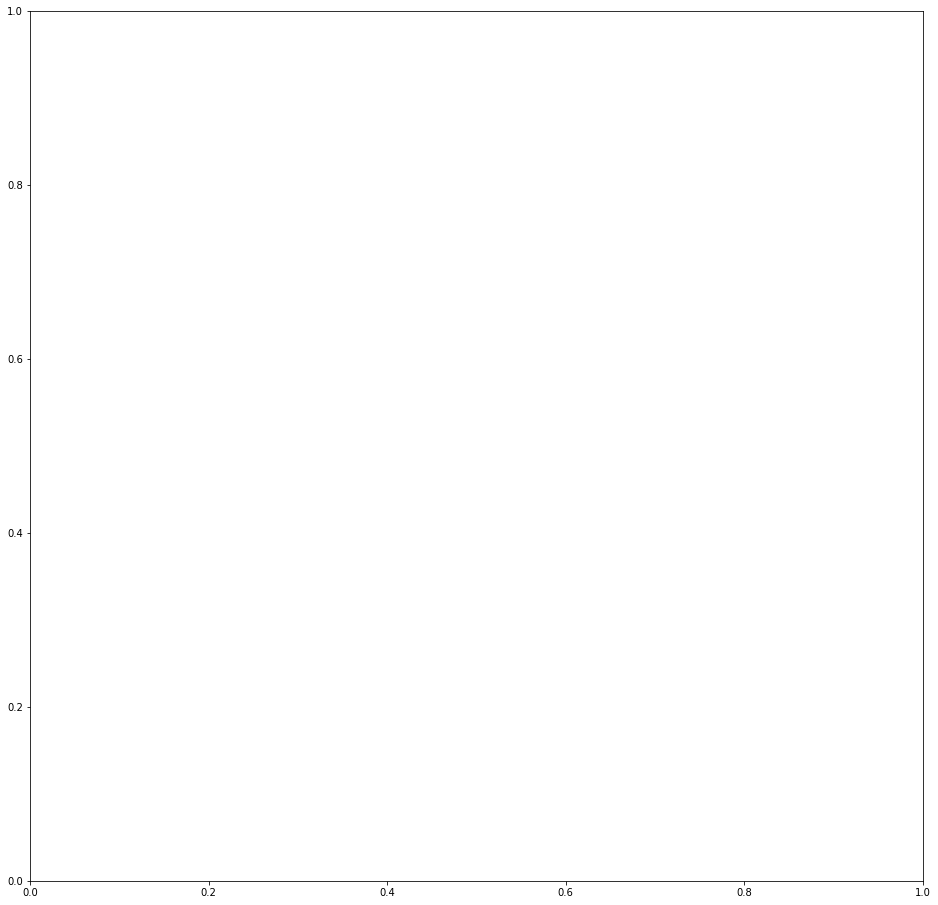

In [122]:
# plot an image with matplotlib
my_map = Map(45., -1., 48.9, 5.5, 6)
image = my_map.get_image()
# create figure
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax
ax
plt.show()

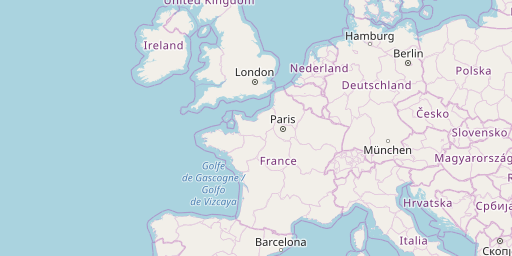

In [51]:
map = smopy.Map((42., -1., 55., 3.), z=4)
map.show_ipython()

(768, 768, 3)
362 260


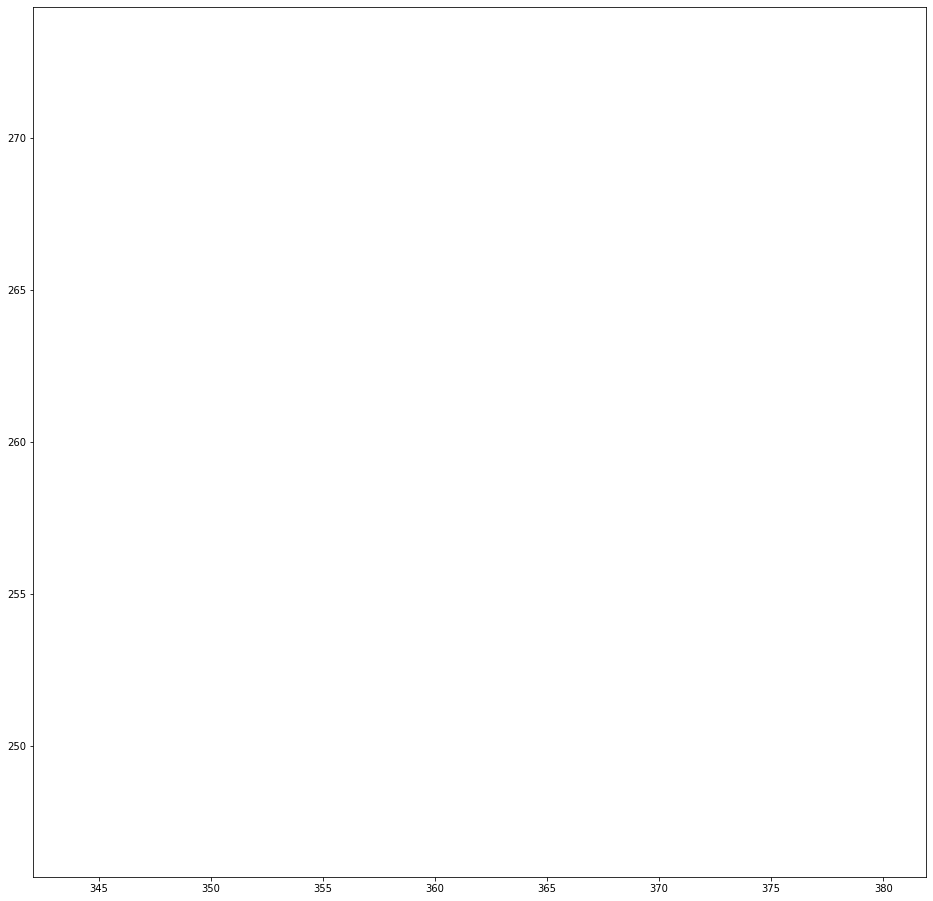

In [115]:
# show image structure
print(image.shape)
# change color of a pixel in the image
Paris_latitude = 48.86151
Paris_longitude = 2.33474
x, y = my_map.to_image_pixels(Paris_latitude, Paris_longitude)
print(x, y)
fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax with a red circle placed on Paris
ax.plot(x,y)

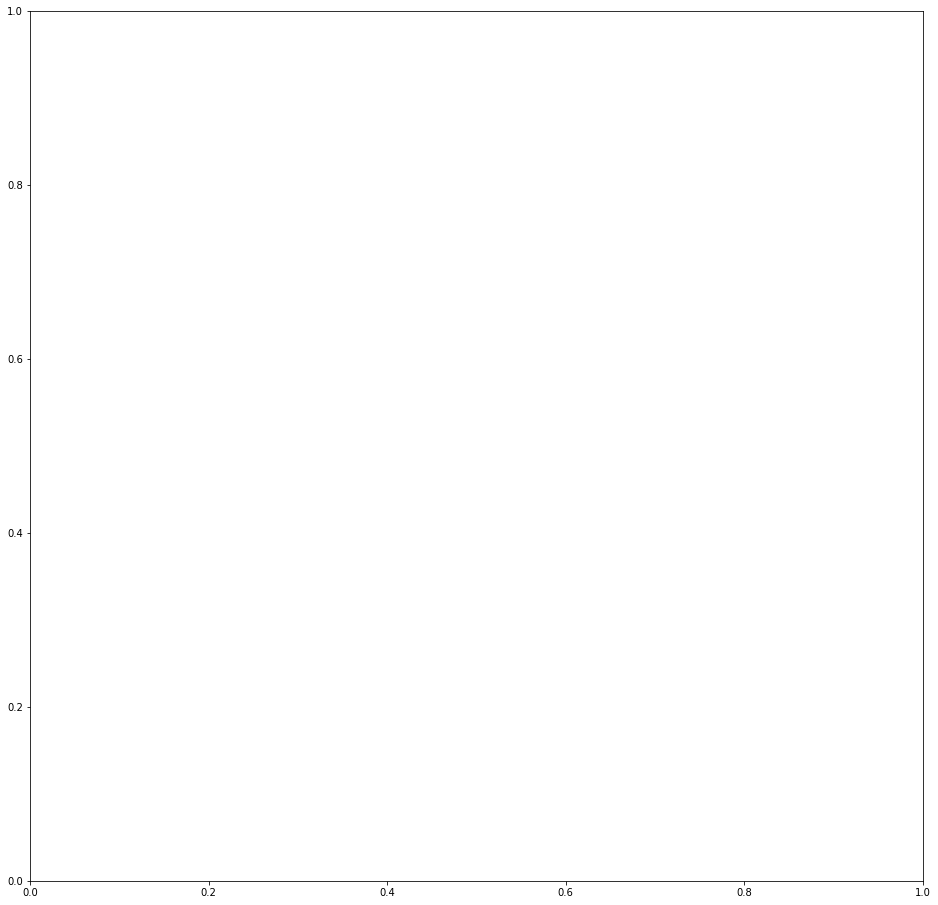

In [137]:
# load a json file
# file is: fr-esr-principaux-etablissements-enseignement-superieur.json

#https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-principaux-etablissements-enseignement-superieur/download/?format=json&timezone=Europe/Berlin
#with open("https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-principaux-etablissements-enseignement-superieur/download/?format=json&timezone=Europe/Berlin", "r") as f:
#    data = json.load(f)

fig = plt.figure(figsize=(16, 16))
# create an 'ax' on the figure
ax = fig.add_subplot(111)
# show image on the ax
# plot schools with circles
# set a different color/shape for 'artistique', 'ingenieur' and 'commerce' labels


# Charts

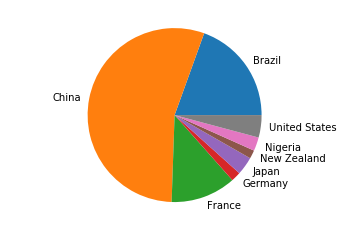

In [128]:
# Load csv: users.csv
# plot a pie chart of nationality of the users
url="https://waterponey.github.io/BigDataClass/files/users.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
sums = data.user_id.groupby(data.country).sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index);
#show()
#data.plot(kind="pie", y = ('country'), autopct='%1.1f%%')

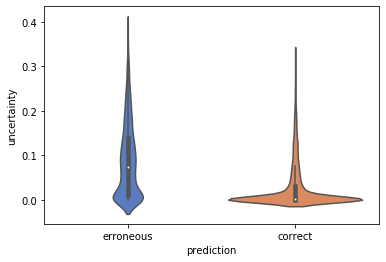

In [136]:
# Load uncertainty.csv
# create violin plots with seaborn
# 'erroneous' next to 'correct' densities

url="https://waterponey.github.io/BigDataClass/files/uncertainty.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))


ax = sns.violinplot(x="prediction", y="uncertainty",
                    data=data, palette="muted",order=["erroneous", "correct"])

,prediction,uncertainty
0,correct,0.208022
1,correct,0.036605
2,correct,0.067507
3,correct,0.035876
4,correct,0.043756
...,...,...
20148,erroneous,0.096348
20149,erroneous,0.178221
20150,erroneous,0.209282
20151,erroneous,0.107856
